# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q="

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | colchani
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | happy valley-goose bay
Processing Record 6 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 7 of Set 1 | mogocha
Processing Record 8 of Set 1 | swan hill
Processing Record 9 of Set 1 | sorong
Processing Record 10 of Set 1 | atascadero
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | vorgashor
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | kourou
Processing Record 18 of Set 1 | burang
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | axim
Processing Record 21 of Set 1 | port alfred
Processing 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [7]:
# Display sample data
# converting date to reflect the date
# converting and formatting the temperature into (F)
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit= "s")
city_data_df["Date"] = city_data_df["Date"].dt.date
city_data_df["Max Temp"] = city_data_df["Max Temp"].apply(lambda k: round(k - 273.15) * 9/5 + 32)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,colchani,-20.3000,-66.9333,50.0,33,96,4.92,BO,2024-06-08
1,qaqortoq,60.7167,-46.0333,39.2,98,100,1.09,GL,2024-06-08
2,adamstown,-25.0660,-130.1015,73.4,82,11,4.97,PN,2024-06-08
3,happy valley-goose bay,53.3168,-60.3315,69.8,46,6,2.86,CA,2024-06-08
4,mogocha,53.7333,119.7667,42.8,60,6,1.31,RU,2024-06-08


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colchani,-20.3000,-66.9333,50.0,33,96,4.92,BO,2024-06-08
1,qaqortoq,60.7167,-46.0333,39.2,98,100,1.09,GL,2024-06-08
2,adamstown,-25.0660,-130.1015,73.4,82,11,4.97,PN,2024-06-08
3,happy valley-goose bay,53.3168,-60.3315,69.8,46,6,2.86,CA,2024-06-08
4,mogocha,53.7333,119.7667,42.8,60,6,1.31,RU,2024-06-08


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

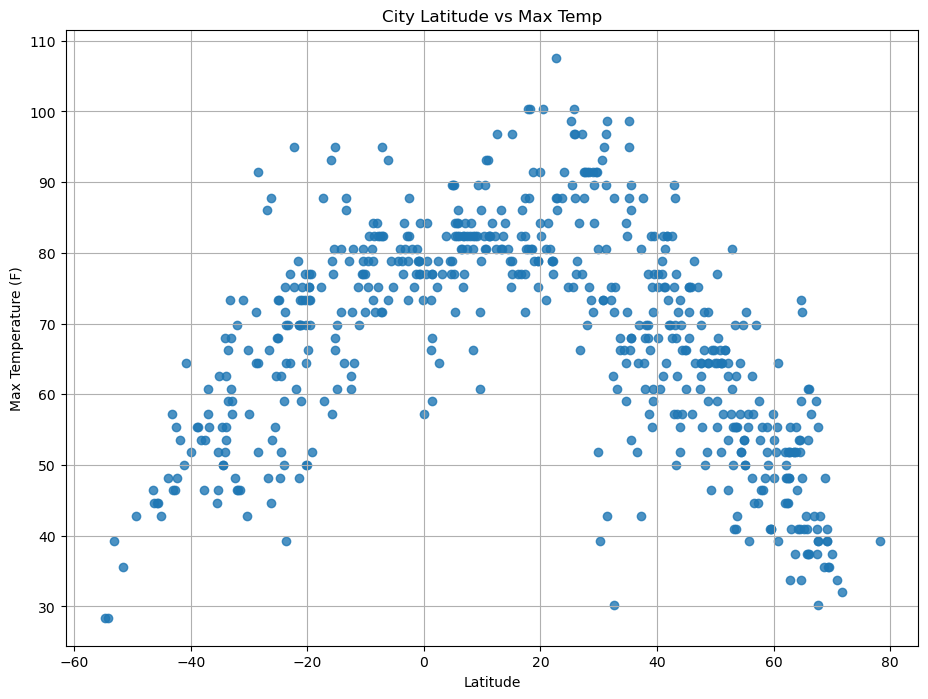

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, marker="o", alpha=0.8)
plt.title(f"City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

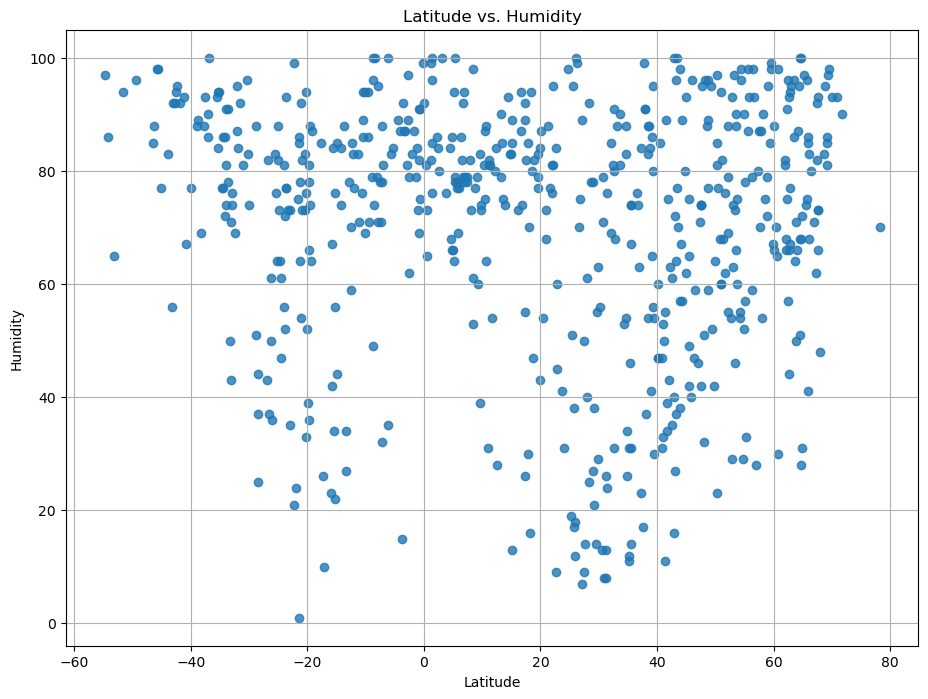

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

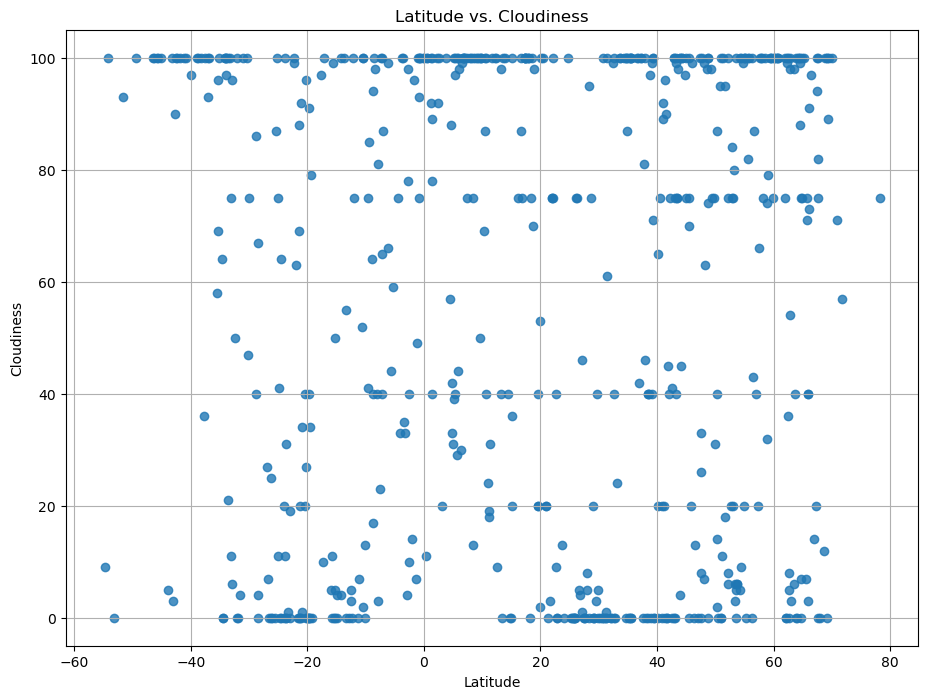

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

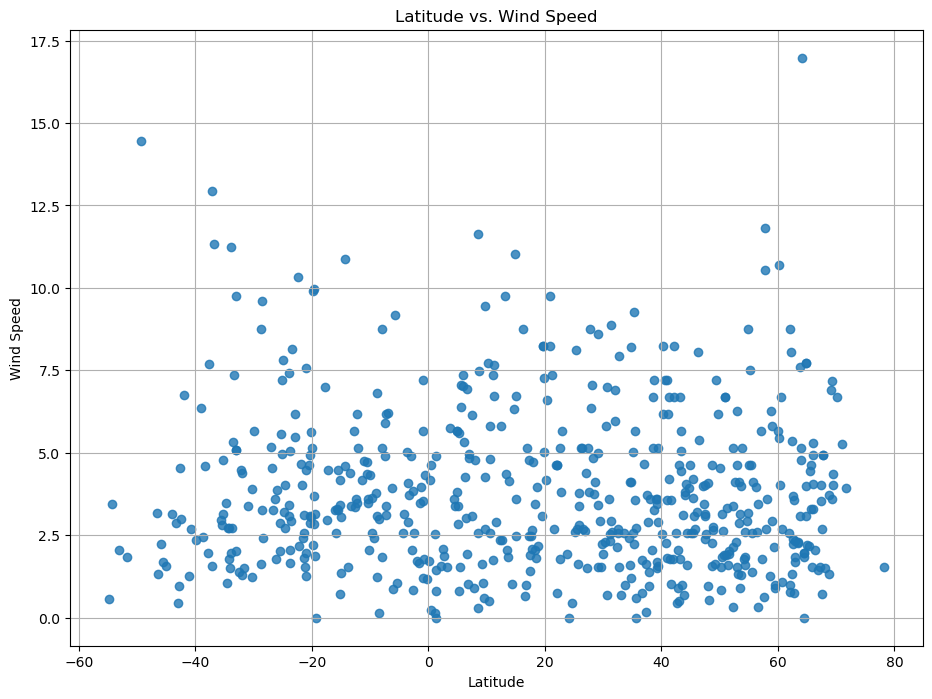

In [13]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, marker="o", alpha=0.8)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define the function to create linear regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, save_file=None):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = x_values * slope + intercept
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.scatter(x_values, y_values, marker="o", alpha=0.8)
    plt.plot(x_values, regress_values, "r-", label=f'y = {slope:.2f}x + {intercept:.2f}')
    
    # Annotate the linear equation on the plot
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (0.05, 0.95), xycoords='axes fraction', fontsize=15, color="red", ha='left', va='center')
    
    # Labeling and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qaqortoq,60.7167,-46.0333,39.2,98,100,1.09,GL,2024-06-08
3,happy valley-goose bay,53.3168,-60.3315,69.8,46,6,2.86,CA,2024-06-08
4,mogocha,53.7333,119.7667,42.8,60,6,1.31,RU,2024-06-08
7,atascadero,35.4894,-120.6707,68.0,67,100,3.58,US,2024-06-08
8,stanley,54.8680,-1.6985,53.6,52,20,8.75,GB,2024-06-08


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colchani,-20.3000,-66.9333,50.0,33,96,4.92,BO,2024-06-08
2,adamstown,-25.0660,-130.1015,73.4,82,11,4.97,PN,2024-06-08
5,swan hill,-35.3378,143.5544,46.4,94,96,2.80,AU,2024-06-08
6,sorong,-0.8833,131.2500,77.0,91,100,3.53,ID,2024-06-08
10,port-aux-francais,-49.3500,70.2167,42.8,96,100,14.44,TF,2024-06-08


###  Temperature vs. Latitude Linear Regression Plot

Correlation between Latitude and Max Temperature in the Northern Hemisphere: -0.74


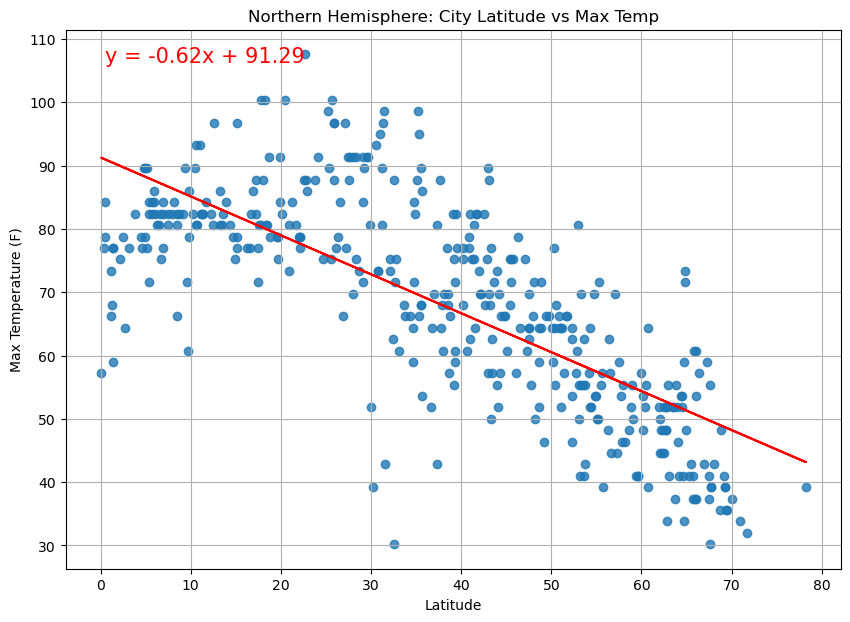

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(
    x_values, 
    y_values, 
    "Northern Hemisphere: City Latitude vs Max Temp", 
    "Latitude", 
    "Max Temperature (F)", 
    "../output_data/NH_Fig1_with_regression.png"
)
north_corr = northern_hemi_df["Lat"].corr(northern_hemi_df["Max Temp"])
print(f"Correlation between Latitude and Max Temperature in the Northern Hemisphere: {north_corr:.2f}")

Correlation between Latitude and Max Temperature in the Southern Hemisphere: 0.77


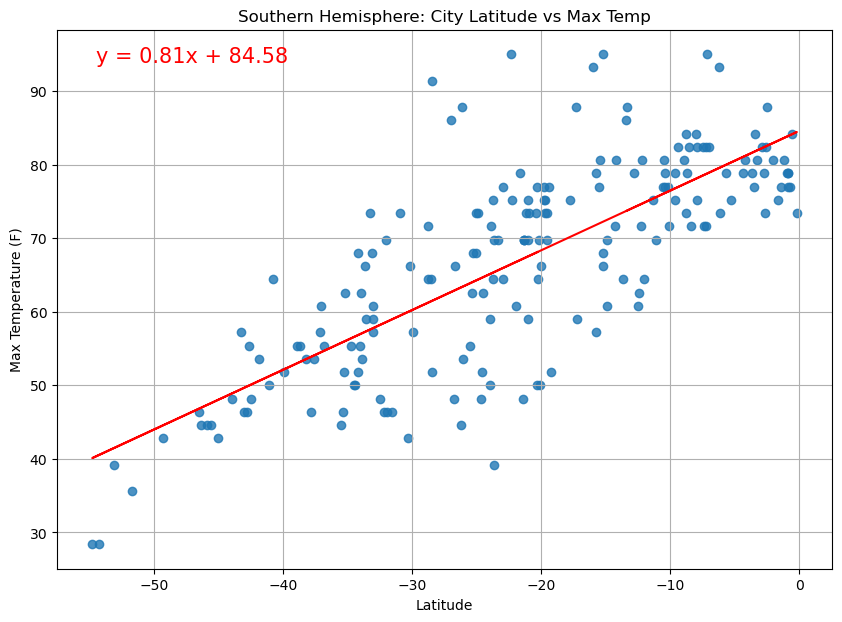

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
    
plot_linear_regression(
    x_values, 
    y_values, 
    "Southern Hemisphere: City Latitude vs Max Temp", 
    "Latitude", 
    "Max Temperature (F)", 
    "../output_data/SH_Fig1_with_regression.png"
    )

south_corr = southern_hemi_df["Lat"].corr(southern_hemi_df["Max Temp"])
print(f"Correlation between Latitude and Max Temperature in the Southern Hemisphere: {south_corr:.2f}")

**Discussion about the linear relationship:** <br> 
The correlation between latitude and Max Temp is strong for both the northern, and southern hemisphere. It is slightly higher on the northern hemisphere (.75), indicating that as we move away from the equator, the maximum temperature will keep dropping in a linear pattern. 

### Humidity vs. Latitude Linear Regression Plot

Correlation between Latitude and Humidity in the Northern Hemisphere: 0.03


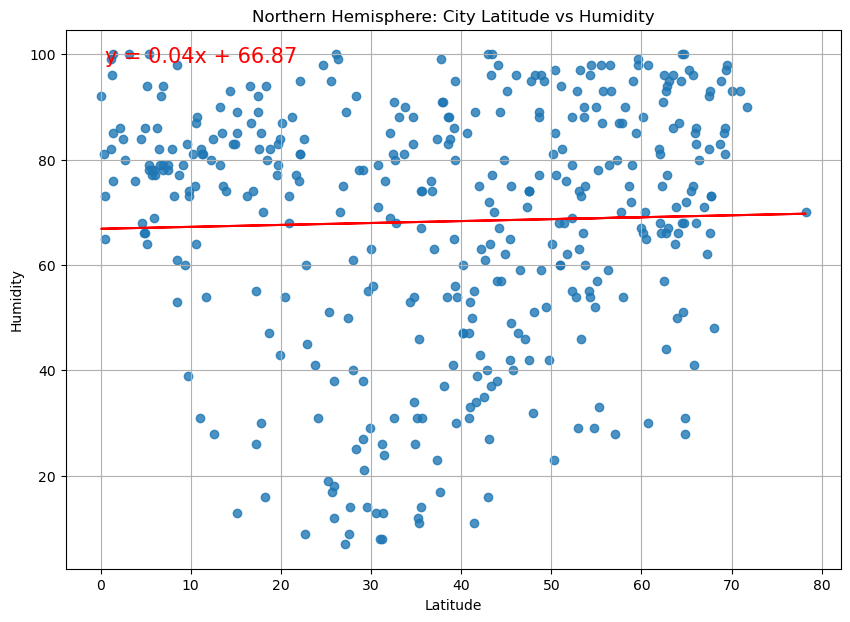

In [19]:
# Northern Hemisphere
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
    
plot_linear_regression(
    x_values, 
    y_values, 
    "Northern Hemisphere: City Latitude vs Humidity", 
    "Latitude", 
    "Humidity", 
    "../output_data/NH_Fig2_with_regression.png"
    )

north_corr = northern_hemi_df["Lat"].corr(northern_hemi_df["Humidity"])
print(f"Correlation between Latitude and Humidity in the Northern Hemisphere: {north_corr:.2f}")

Correlation between Latitude and Humidity in the Southern Hemisphere: -0.11


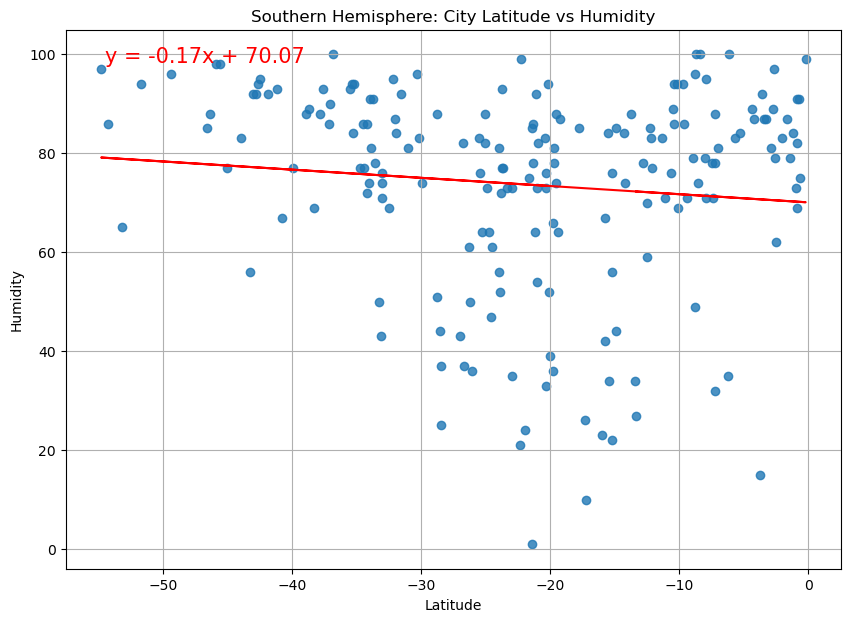

In [20]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
    
plot_linear_regression(
    x_values, 
    y_values, 
    "Southern Hemisphere: City Latitude vs Humidity", 
    "Latitude", 
    "Humidity", 
    "../output_data/SH_Fig2_with_regression.png"
    )

south_corr = southern_hemi_df["Lat"].corr(southern_hemi_df["Humidity"])
print(f"Correlation between Latitude and Humidity in the Southern Hemisphere: {south_corr:.2f}")

**Discussion about the linear relationship:** <br>
I dont think there is much correlation between latitude and humidity. The north having a correlation of (.01), and the south having a correlation of (.07). Which is showing us that there is not much of a correlation in the linear relationship. <br>
There is a very slight correlation with the humidity being higher the further traveled away from the hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

Correlation between Latitude and Cloudiness in the Northern Hemisphere: -0.03


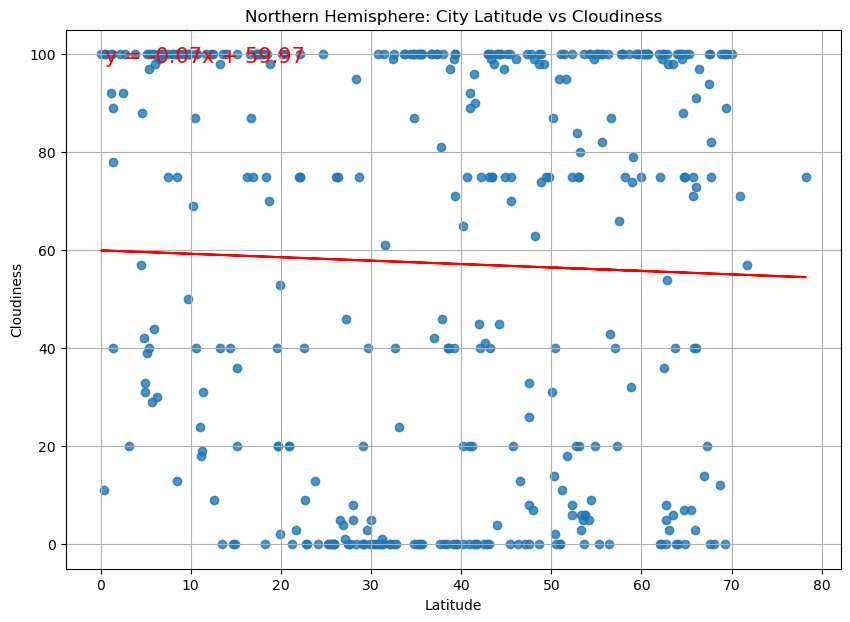

In [21]:
# Northern Hemisphere
# Northern Hemisphere
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
    
plot_linear_regression(
    x_values, 
    y_values, 
    "Northern Hemisphere: City Latitude vs Cloudiness", 
    "Latitude", 
    "Cloudiness", 
    "../output_data/NH_Fig3_with_regression.png"
    )

north_corr = northern_hemi_df["Lat"].corr(northern_hemi_df["Cloudiness"])
print(f"Correlation between Latitude and Cloudiness in the Northern Hemisphere: {north_corr:.2f}")

Correlation between Latitude and Cloudiness in the Southern Hemisphere: -0.13


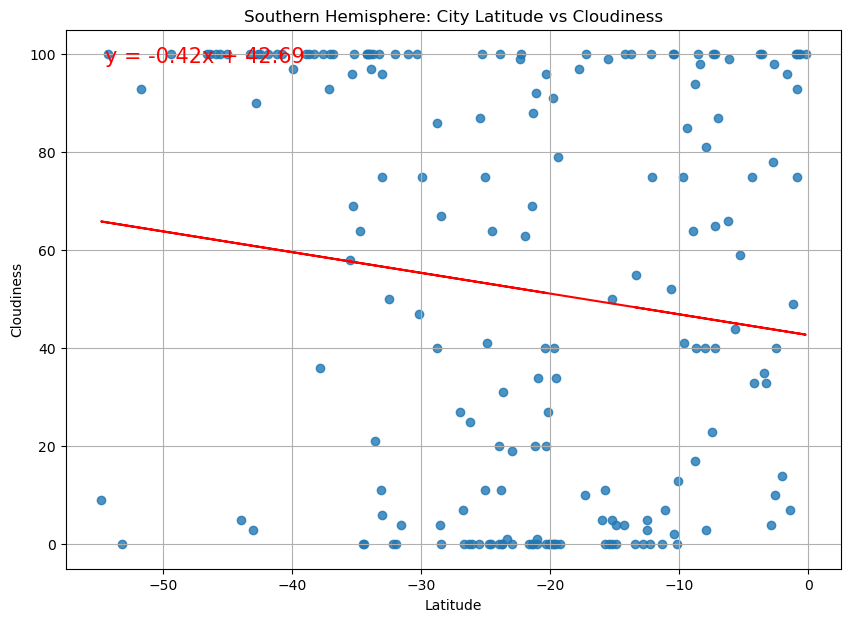

In [22]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
    
plot_linear_regression(
    x_values, 
    y_values, 
    "Southern Hemisphere: City Latitude vs Cloudiness", 
    "Latitude", 
    "Cloudiness", 
    "../output_data/SH_Fig3_with_regression.png"
    )

south_corr = southern_hemi_df["Lat"].corr(southern_hemi_df["Cloudiness"])
print(f"Correlation between Latitude and Cloudiness in the Southern Hemisphere: {south_corr:.2f}")

**Discussion about the linear relationship:** <br>
There is no correlation between latitude and cloudiness for both the northen hemisphere and the southern. Both show very scatters plots, with no real form of having a linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

Correlation between Latitude and Wind Speed in the Northern Hemisphere: -0.04


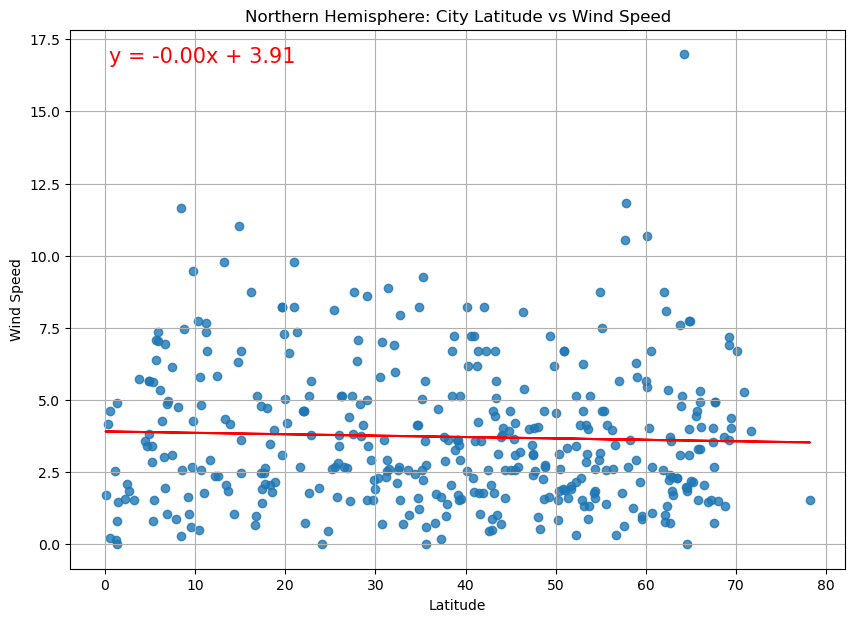

In [23]:
# Northern Hemisphere
# Northern Hemisphere
# Northern Hemisphere
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
    
plot_linear_regression(
    x_values, 
    y_values, 
    "Northern Hemisphere: City Latitude vs Wind Speed", 
    "Latitude", 
    "Wind Speed", 
    "../output_data/NH_Fig4_with_regression.png"
    )

north_corr = northern_hemi_df["Lat"].corr(northern_hemi_df["Wind Speed"])
print(f"Correlation between Latitude and Wind Speed in the Northern Hemisphere: {north_corr:.2f}")

Correlation between Latitude and Wind Speed in the Southern Hemisphere: -0.02


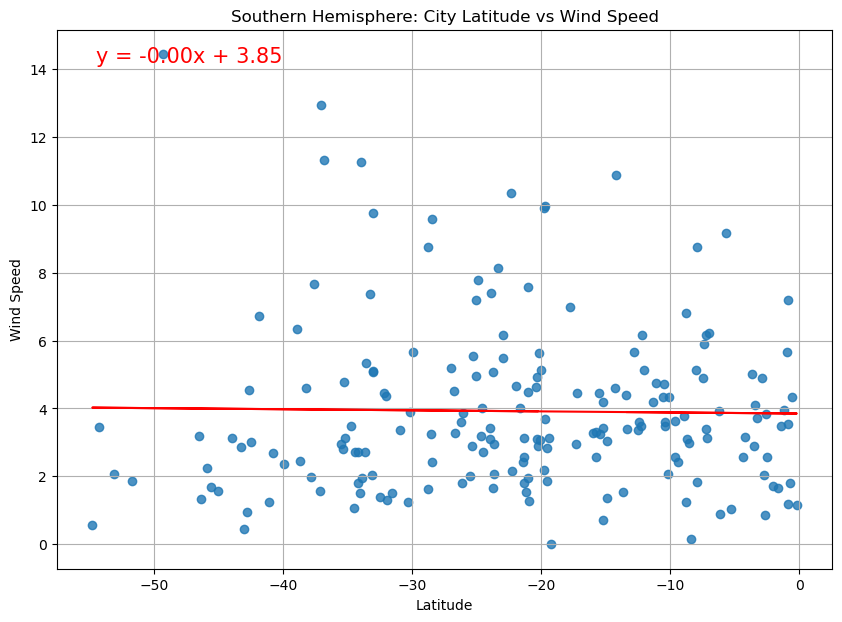

In [24]:
# Southern Hemisphere
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
    
plot_linear_regression(
    x_values, 
    y_values, 
    "Southern Hemisphere: City Latitude vs Wind Speed", 
    "Latitude", 
    "Wind Speed", 
    "../output_data/SH_Fig4_with_regression.png"
    )

south_corr = southern_hemi_df["Lat"].corr(southern_hemi_df["Wind Speed"])
print(f"Correlation between Latitude and Wind Speed in the Southern Hemisphere: {south_corr:.2f}")

**Discussion about the linear relationship:** <br>
Both the northern and the southern hemisphere show very evenly scattered values. However, there may be a very slight correlation between wind speed, being slower closer to the hemisphere. 